##### In this notebook, I've tried to go over each attribute seperaly. The goal is to understand each attribute and the information it holds. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/elkha/Desktop/clinvar_conflicting.csv")

C:\Users\elkha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,38,40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### dropping attributes/features with >80% of missing values. 

In [3]:
df=df.drop(['MOTIF_SCORE_CHANGE',    
            'HIGH_INF_POS',          
            'MOTIF_POS',             
            'MOTIF_NAME',            
            'DISTANCE',              
            'SSR',                   
            'CLNSIGINCL',            
            'CLNDNINCL',            
            'CLNDISDBINCL',
           'INTRON'],axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             65188 non-null  object 
 1   POS               65188 non-null  int64  
 2   REF               65188 non-null  object 
 3   ALT               65188 non-null  object 
 4   AF_ESP            65188 non-null  float64
 5   AF_EXAC           65188 non-null  float64
 6   AF_TGP            65188 non-null  float64
 7   CLNDISDB          65188 non-null  object 
 8   CLNDN             65188 non-null  object 
 9   CLNHGVS           65188 non-null  object 
 10  CLNVC             65188 non-null  object 
 11  CLNVI             27659 non-null  object 
 12  MC                64342 non-null  object 
 13  ORIGIN            65188 non-null  int64  
 14  CLASS             65188 non-null  int64  
 15  Allele            65188 non-null  object 
 16  Consequence       65188 non-null  object

### CHROM
##### Chromosome the variant is located on. 


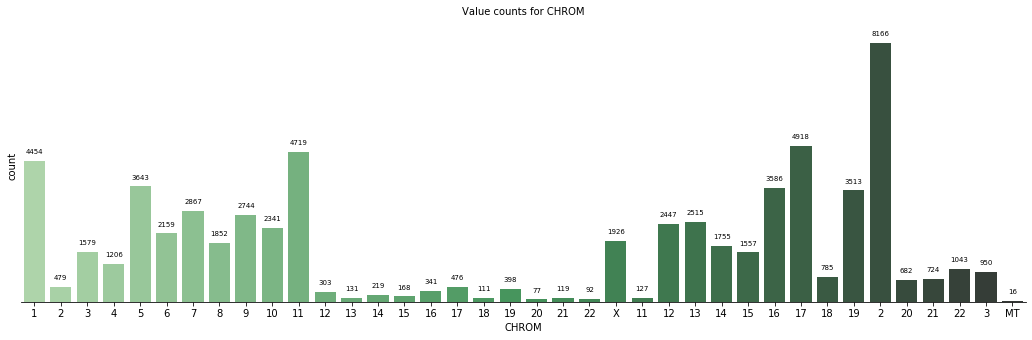

In [60]:
f3, ax3 = plt.subplots(figsize=(18,5))
ax3 = sns.countplot(x="CHROM", data=df, palette='Greens_d')
ax3.grid(False)

for p in ax3.patches:
    ax3.annotate(int(p.get_height()), 
                   ( p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                    fontsize=7)
sns.despine()
sns.despine(left=True)
ax3.set(yticks=[])

my_text=ax3.set_title('Value counts for CHROM',fontsize=10, pad=15)

##### Some values are redundant. 11 and 12 are examples. 

In [10]:
df['CHROM'].value_counts().index.values

array([2, 17, '11', '1', '5', 16, 19, '7', '9', 13, 12, '10', '6', 'X',
       '8', 14, '3', 15, '4', 22, 3, 18, 21, 20, '2', '17', '19', '16',
       '12', '14', '15', '13', 11, '21', '18', '22', '20', 'MT'],
      dtype=object)

##### The code below converts all the chrom values to strings, to get rid of redundancies in the plot. 

In [11]:
a=df['CHROM'].astype('str')
df['CHROM']=a.values
df['CHROM'].value_counts().index.values

array(['2', '17', '11', '1', '16', '19', '5', '7', '12', '9', '13', '3',
       '10', '6', '14', 'X', '8', '15', '4', '22', '18', '21', '20', 'MT'],
      dtype=object)

##### The new version of the plot:

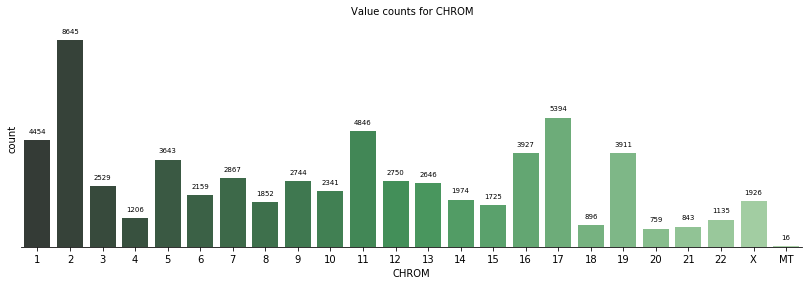

In [14]:
f3, ax3 = plt.subplots(figsize=(14,4))
ax3 = sns.countplot(x="CHROM", data=df, palette='Greens_d',)

ax3.grid(False)

for p in ax3.patches:
    ax3.annotate(int(p.get_height()), 
                   ( p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                    fontsize=7)
sns.despine()
sns.despine(left=True)
ax3.set(yticks=[])

my_text=ax3.set_title('Value counts for CHROM',fontsize=10, pad=15)

### POS
##### Position on the chromosome the variant is located on.


In [5]:
df["POS"].value_counts()

89876827     11
179578108     9
73613031      8
92944314      7
103629803     7
             ..
41557033      1
49419304      1
2718696       1
144995364     1
792579        1
Name: POS, Length: 63115, dtype: int64

In [6]:
a=df["POS"].describe()
d=pd.DataFrame(a)
d=d.T
d.insert(0, "example", df["POS"].unique()[0])
d.insert(1,"dtype",(df["POS"].dtypes))
d.insert(2,'missing values (%)',df["POS"].isnull().sum()*100/65186)
d.insert(3,'unique values', len(df["POS"].unique()))
d.drop(['count'],axis=1, inplace=True)
d

,example,dtype,missing values (%),unique values,mean,std,min,25%,50%,75%,max
POS,1168180,int64,0.0,63115,7.757594e+07,5.974051e+07,961.0,32541793.0,57970213.0,1.127454e+08,247607973.0


C:\Users\elkha\anaconda3\lib\site-packages\seaborn\distributions.py:561: MatplotlibDeprecationWarning: Saw kwargs ['ec', 'edgecolor'] which are all aliases for 'edgecolor'.  Kept value from 'edgecolor'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  **artist_kws,


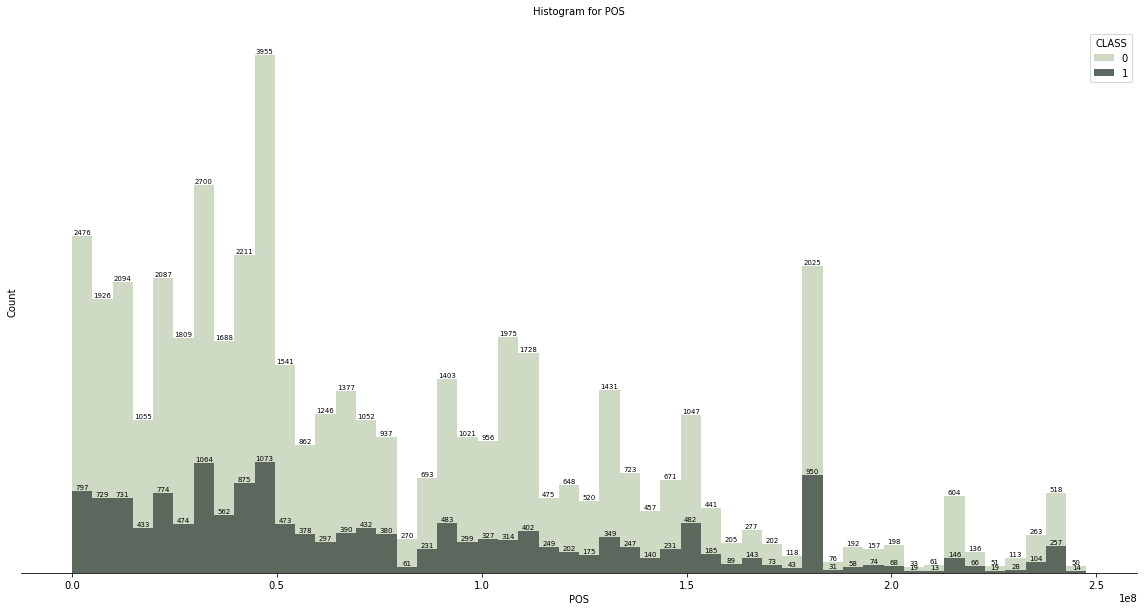

In [139]:
colors = ["#C0CEB2","#253628"]
customPalette=sns.set_palette(sns.color_palette(colors))

f4, ax4 = plt.subplots(figsize=(20,10))
ax4 = sns.histplot(df, x='POS', bins=50, palette=customPalette,lw=0, hue='CLASS', ec='#253628',multiple="stack")

ax4.grid(False)


for i in range (int(len(ax4.patches)/2)): 
    p1= ax4.patches[i]
    p2= ax4.patches[i+50]
    
    height= int(p1.get_height())+int(p2.get_height())
    ax4.annotate(int(p2.get_height()), ( p1.get_x() + p1.get_width() / 2, height), ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points',fontsize=7)
    ax4.annotate(int(p1.get_height()), 
                   ( p1.get_x() + p1.get_width() / 2, p1.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 4), 
                   textcoords = 'offset points',
                    fontsize=7)
    

sns.despine()
sns.despine(left=True)
ax4.set(yticks=[])

my_text=ax4.set_title('Histogram for POS',fontsize=10, pad=15)